## Exercice :

### Origine sociale (CSP parents) vs. Choix d’études à l’Université

Quelques questions simples pour caractériser la relation :
1. Structure des filières choisies selon la CSP;
2. Différences/ressemblances des structures de choix selon les CSP;
3. Structure des CSP des parents selon les filières;
4. Associations entre CSP et FILIERES.

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
# Installation du package fanalysis
#!pip install fanalysis==0.0.1

In [3]:
import pandas as pd
import numpy as np
from fanalysis.ca import CA

In [7]:
df = pd.read_excel("afc_ex.xlsx",index_col=0)
df

,Droit,Science,Medecine,IUT
CSP/Fil.,,,,
Exp.agri,80,99,65,58
Patron,168,137,208,63
Cadre.sup,470,400,876,79
Emp.,145,133,135,54
Ouvrier,166,193,127,129


In [9]:
X = df.to_numpy(dtype=float) #转化为多维数组形式
print(X)

[[ 80.  99.  65.  58.]
 [168. 137. 208.  63.]
 [470. 400. 876.  79.]
 [145. 133. 135.  54.]
 [166. 193. 127. 129.]]


In [10]:
n=np.sum(X) #计算总频数
n

np.float64(3785.0)

In [11]:
F = X/n  #计算相对频数
F

array([[0.02113606, 0.02615588, 0.01717305, 0.01532365],
       [0.04438573, 0.03619551, 0.05495376, 0.01664465],
       [0.12417437, 0.10568032, 0.23143989, 0.02087186],
       [0.03830911, 0.03513871, 0.03566711, 0.01426684],
       [0.04385733, 0.05099075, 0.0335535 , 0.0340819 ]])

In [12]:
#计算行剖面：对于某一行（即某个“父母职业类别”），它在不同列（即不同“大学专业选择”）上的比例分布。
Profils_ligne=F.copy()

# Calcul de la somme par ligne fi.
somme_ligne=np.sum(F,axis=1)

# Calcul des profils ligne
for i in range(np.shape(F)[0]):
  for j in range(np.shape(F)[1]):
    Profils_ligne[i,j]=round(Profils_ligne[i,j]/somme_ligne[i],3)

# Récupération des résultats dans un DataFrame
df_profils_ligne = pd.DataFrame(Profils_ligne, columns=df.columns,index=df.index)
df_profils_ligne

,Droit,Science,Medecine,IUT
CSP/Fil.,,,,
Exp.agri,0.265,0.328,0.215,0.192
Patron,0.292,0.238,0.361,0.109
Cadre.sup,0.258,0.219,0.480,0.043
Emp.,0.310,0.285,0.289,0.116
Ouvrier,0.270,0.314,0.207,0.210


In [13]:
#计算列剖面：对于某一列（即某个“大学专业选择”），它在不同行（即不同“父母职业类别”）上的比例分布。
Profils_colonne=F.copy()

# Calcul de la somme par colonne fj.
somme_colonne=np.sum(F,axis=0)

# Calcul des profils colonne
for i in range(np.shape(F)[0]):
  for j in range(np.shape(F)[1]):
    Profils_colonne[i,j]=round(Profils_colonne[i,j]/somme_colonne[j],3)

# Récupération des résultats dans un DataFrame
df_profils_colonne = pd.DataFrame(Profils_colonne, columns=df.columns,index=df.index)
df_profils_colonne

,Droit,Science,Medecine,IUT
CSP/Fil.,,,,
Exp.agri,0.078,0.103,0.046,0.151
Patron,0.163,0.142,0.147,0.164
Cadre.sup,0.457,0.416,0.621,0.206
Emp.,0.141,0.138,0.096,0.141
Ouvrier,0.161,0.201,0.090,0.337


In [14]:
#计算平均行剖面
Profil_moyen_ligne = np.around(somme_colonne,3)

# Récupération dans un DataFrame
df_profil_moyen_ligne=pd.DataFrame(Profil_moyen_ligne.reshape(1,np.shape(F)[1]),columns=df.columns,index=['Profil_ligne_moyen'])

# Synthèse des profils lignes
df_profils_ligne = pd.concat([df_profils_ligne,df_profil_moyen_ligne])
df_profils_ligne

,Droit,Science,Medecine,IUT
Exp.agri,0.265,0.328,0.215,0.192
Patron,0.292,0.238,0.361,0.109
Cadre.sup,0.258,0.219,0.480,0.043
Emp.,0.310,0.285,0.289,0.116
Ouvrier,0.270,0.314,0.207,0.210
Profil_ligne_moyen,0.272,0.254,0.373,0.101


In [15]:
#列平均剖面
Profil_moyen_colonne = np.around(somme_ligne,3)

# Synthèse des profils colonnes
df_profils_colonne["Profil_moyen_colonne"]=Profil_moyen_colonne
df_profils_colonne

,Droit,Science,Medecine,IUT,Profil_moyen_colonne
CSP/Fil.,,,,,
Exp.agri,0.078,0.103,0.046,0.151,0.080
Patron,0.163,0.142,0.147,0.164,0.152
Cadre.sup,0.457,0.416,0.621,0.206,0.482
Emp.,0.141,0.138,0.096,0.141,0.123
Ouvrier,0.161,0.201,0.090,0.337,0.162


In [16]:
# La classe CA est initiée avec respectivement, les points lignes, les points colonnes et le nombre de composantes à retenir
afc = CA(row_labels=df.index.values, col_labels=df.columns.values,n_components=2)

In [17]:
# On estime le modèle en appliquant la méthode fit de la classe CA sur le jeu de données
afc.fit(F)

CA(col_labels=array(['Droit', 'Science', 'Medecine', 'IUT'], dtype=object),
   n_components=2,
   row_labels=array(['Exp.agri', 'Patron', 'Cadre.sup', 'Emp.', 'Ouvrier'], dtype=object))

In [22]:
# Affichage des valeurs propres 绝对特征值
print(afc.eig_[0])

[0.08231106 0.00168257]


In [23]:
# Pourcentage de l'inertie exprimée par chaque axe 每个主成分解释的方差百分比
print(afc.eig_[1])

[97.3334662  1.9896516]


In [24]:
# Pourcentage cumulé de l'inertie totale 累计方差百分比
print(afc.eig_[2])

[97.3334662 99.3231178]


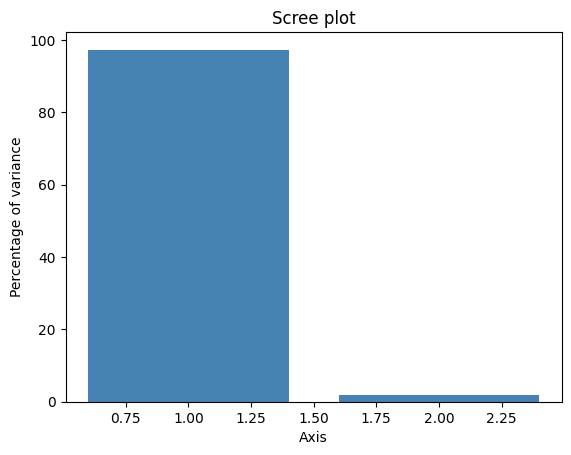

In [26]:
afc.plot_eigenvalues(type="percentage")#绘制出每个主成分（也叫“轴”）所解释的惯性百分比（也就是方差比例）

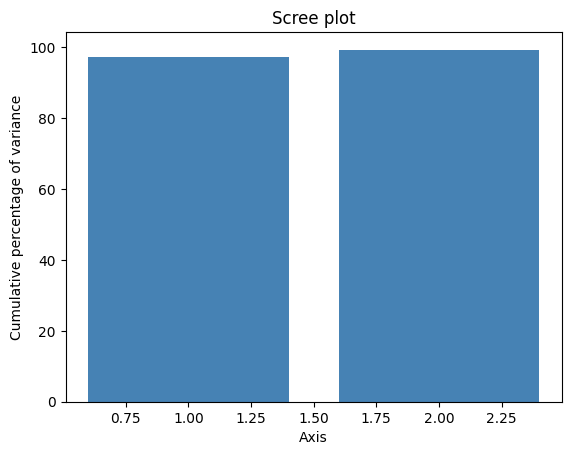

In [27]:
afc.plot_eigenvalues(type="cumulative") #累计百分比

In [28]:
df_rows = afc.row_topandas()
df_rows

,row_coord_dim1,row_coord_dim2,row_contrib_dim1,row_contrib_dim2,row_cos2_dim1,row_cos2_dim2
Exp.agri,0.409300,-0.025581,16.239297,3.103142,0.987167,0.003856
Patron,0.023393,0.023966,0.101170,5.194893,0.155557,0.163278
Cadre.sup,-0.263181,-0.015126,40.573908,6.556144,0.996089,0.003290
Emp.,0.141529,0.097860,3.002494,70.223833,0.666802,0.318797
Ouvrier,0.450615,-0.039309,40.083131,14.921988,0.992088,0.007550


In [39]:
# Coordonnées des points lignes  行点坐标
print(np.round(afc.row_coord_,3))

[[ 0.409 -0.026]
 [ 0.023  0.024]
 [-0.263 -0.015]
 [ 0.142  0.098]
 [ 0.451 -0.039]]


In [40]:
# Contributions des points lignes #行点贡献
np.set_printoptions(suppress=True)
print(np.round(afc.row_contrib_,3))

[[16.239  3.103]
 [ 0.101  5.195]
 [40.574  6.556]
 [ 3.002 70.224]
 [40.083 14.922]]


In [41]:
# Qualité de représentation COS2 des points colonnes 行点表示质量
print(np.round(afc.col_cos2_,3))

[[0.168 0.768]
 [0.945 0.   ]
 [0.99  0.009]
 [0.989 0.009]]


In [33]:
df_cols = afc.col_topandas()
df_cols

,col_coord_dim1,col_coord_dim2,col_contrib_dim1,col_contrib_dim2,col_cos2_dim1,col_cos2_dim2
Droit,0.028124,0.060061,0.261244,58.285261,0.168338,0.767729
Science,0.160310,0.003275,7.935510,0.162003,0.944570,0.000394
Medecine,-0.303205,-0.029529,41.636552,19.318997,0.990315,0.009393
IUT,0.638808,-0.060803,50.166694,22.233739,0.988647,0.008957


In [34]:
# Coordonnées des points colonnes  列点坐标
print(np.round(afc.col_coord_,3))

[[ 0.028  0.06 ]
 [ 0.16   0.003]
 [-0.303 -0.03 ]
 [ 0.639 -0.061]]


In [42]:
# Contributions des points lignes #列点贡献
np.set_printoptions(suppress=True)#抑制小数以科学计数法显示
print(np.round(afc.col_contrib_,3))

[[ 0.261 58.285]
 [ 7.936  0.162]
 [41.637 19.319]
 [50.167 22.234]]


In [43]:
# Qualité de représentation COS2 des points colonnes 列点表示质量
print(np.round(afc.col_cos2_,3))

[[0.168 0.768]
 [0.945 0.   ]
 [0.99  0.009]
 [0.989 0.009]]


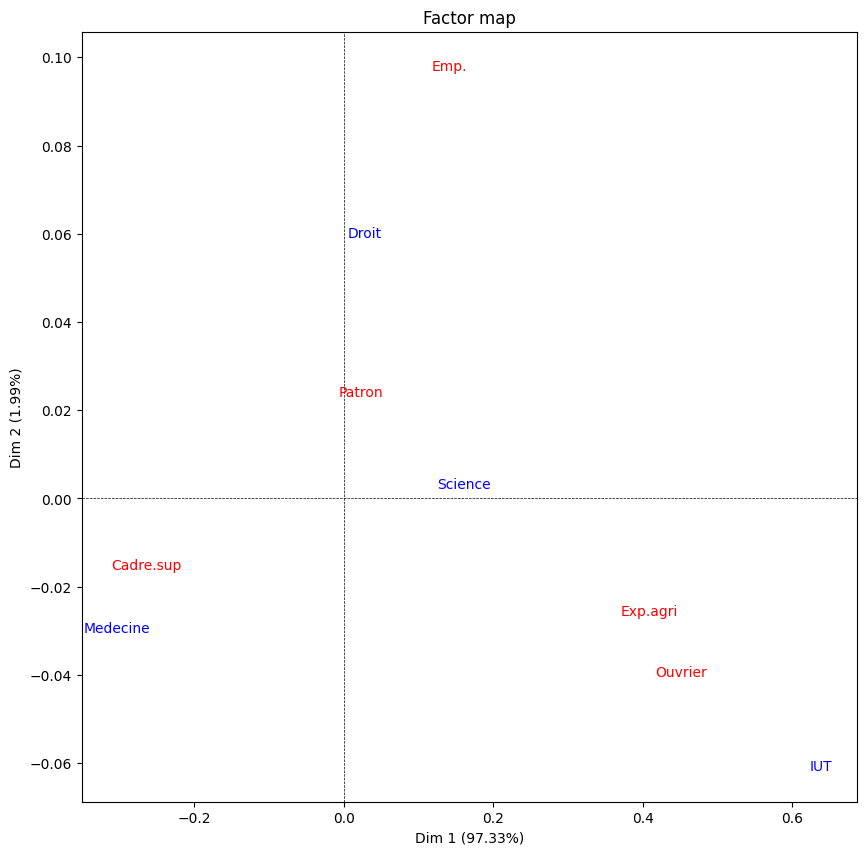

In [44]:
#同时展示行点与列点（Biplot 图）
# Représentation graphique simultanée des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
afc.mapping(num_x_axis=1, num_y_axis=2,figsize=(10,10))

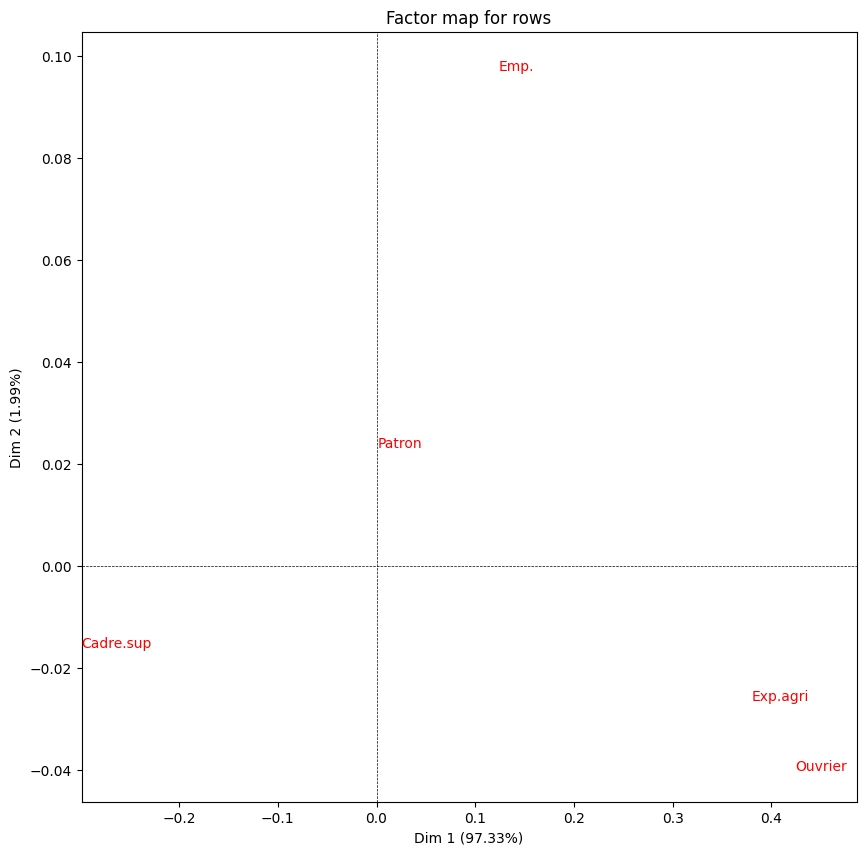

In [45]:
# Représentation graphique des points lignes 展示行点
afc.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(10,10))

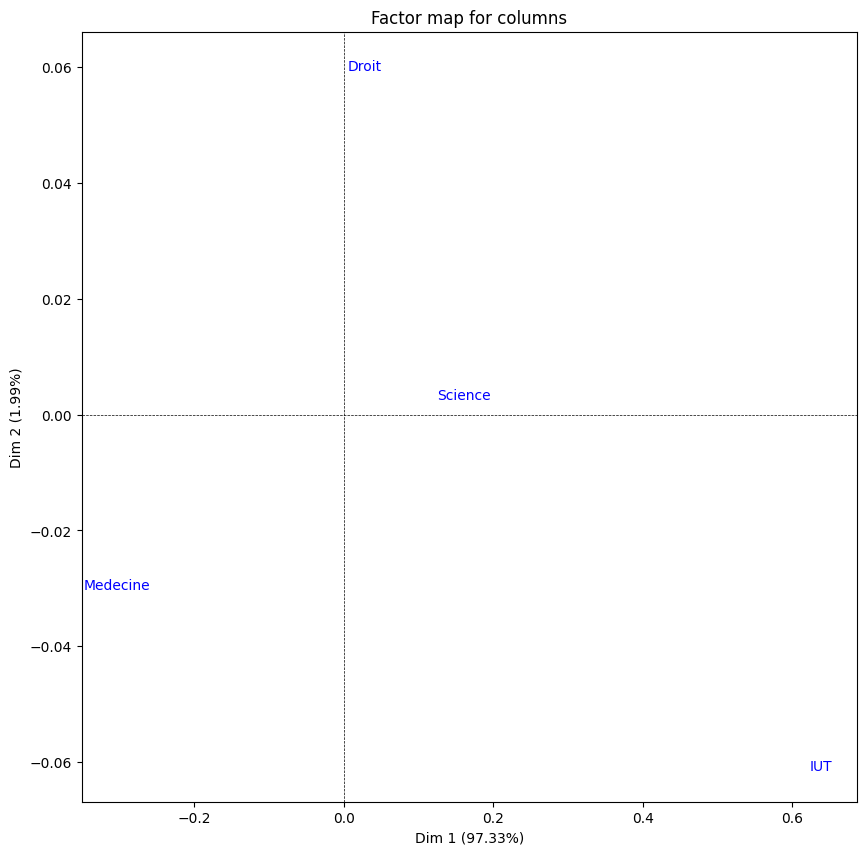

In [46]:
# Représentation graphique des points colonnes 展示列点
afc.mapping_col(num_x_axis=1, num_y_axis=2,figsize=(10,10))

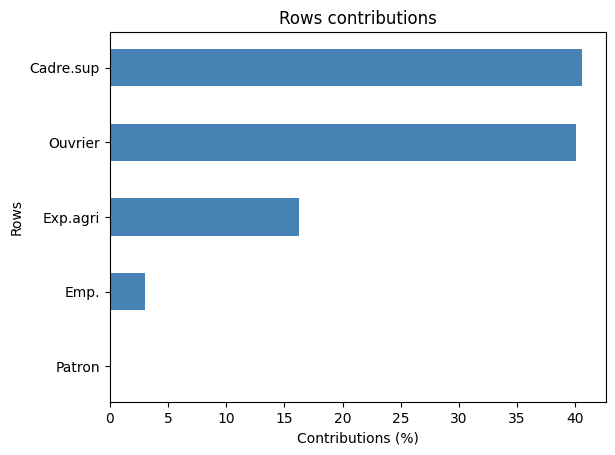

In [48]:
#行点（CSP职业类别）对第一主成分的贡献度 贡献度高的点在解释这个主成分时最重要
# Classement des points lignes en fonction de leurs contributions au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici représentées
afc.plot_row_contrib(num_axis=1)

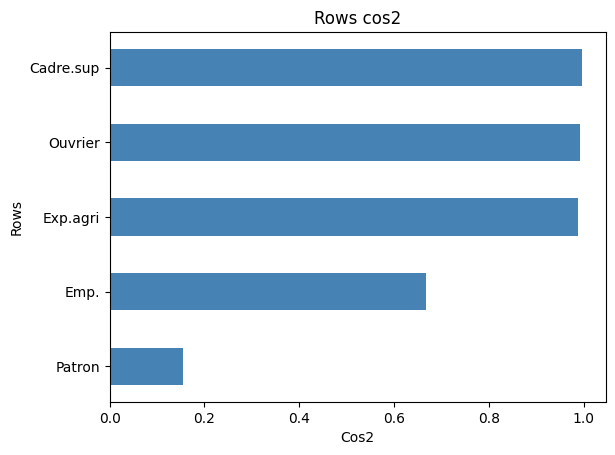

In [52]:
# Classement des points lignes en fonction de leur COS2 sur le 1er axe 
#显示每个“行点”在第1轴上的表示质量（cos²）
#越接近1表示它在该轴上的投影位置可靠度更高
afc.plot_row_cos2(num_axis=1)

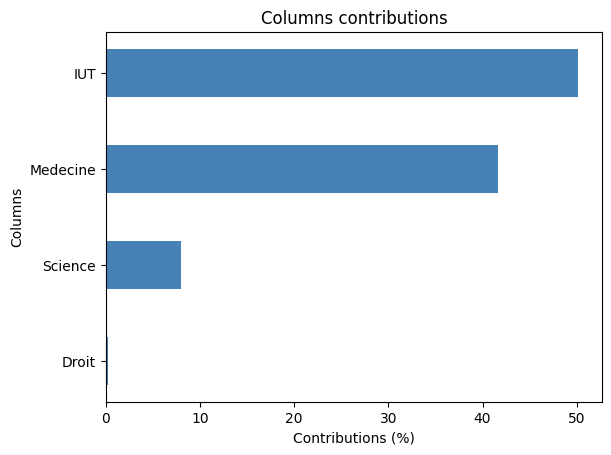

In [53]:
#列点（大学专业类型）对第一主成分的贡献度 贡献度高的点在解释这个主成分时最重要
# Classement des points colonnes en fonction de leurs contributions au 1er axe
afc.plot_col_contrib(num_axis=1)

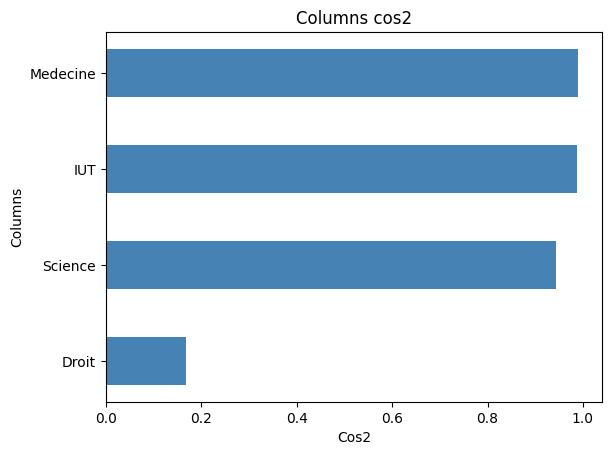

In [54]:
#显示每个“列点”在第1轴上的表示质量（cos²）
#越接近1表示它在该轴上的投影位置可靠度更高
# Classement des points colonnes en fonction de leur COS2 sur le 1er axe
afc.plot_col_cos2(num_axis=1)

1. Dim 1 traduit essentiellement l’opposition « Médecine ↔ IUT ».
Côté filières, l’IUT est fortement corrélé positivement au premier axe, tout comme la Science,
et toutes deux affichent une excellente qualité de représentation (cos² élevé).
Côté CSP, Exp.agri et Ouvrier sont eux aussi positivement corrélés au premier axe avec un cos² proche de 1,
ce qui indique que les ouvriers et les exploitants agricoles ont une nette tendance à choisir l’IUT et les Sciences.

En revanche :
La Médecine est clairement corrélée négativement au premier axe et bénéficie d’une qualité de représentation élevée.
Cadre.sup est lui aussi fortement corrélé négativement à cet axe avec un cos² élevé, ce qui signifie que les étudiants issus d’un milieu de cadres 
sont plutôt orientés vers la Médecine.

2. Exp.agri et Ouvrier : tous deux obtiennent un score élevé sur le premier axe (Dim 1) et un cos² proche de 1, ce qui montre que leurs structures de choix sont très similaires – ils privilégient nettement l’IUT et les Sciences.

Patron et Employé : positionnés près de l’origine sur l’axe principal (Dim 1 ≈ 0, Dim 2 > 0), ils présentent une structure de choix plus « mixte », ni fortement tournés vers l’IUT/Science ni exclusivement vers la Médecine.

Cadre.sup : seule catégorie à être clairement négative sur Dim 1 (avec un cos² élevé), sa structure est distincte et marquée par une préférence pour la Médecine, la plaçant à l’écart des autres groupes.

Les contributions à l’axe 1 sont maximales pour Exp.agri, Ouvrier et Cadre.sup (≈ 40 %), ce qui signifie qu’ils distinguent le mieux le contraste « technico/scientifique » vs « médical ». À l’inverse, Patron et Employé ont des contributions et cos² faibles, indiquant un profil plus centralisé, moins bien expliqué par cet axe.

En conclusion :
– Exp.agri et Ouvrier forment un groupe homogène.
– Patron et Employé en forment un autre.
– Cadre.sup se distingue comme un groupe à part.

3. Le point Droit se situe près de Emp. ; dans le graphique des contributions des colonnes, le cos² de Droit est le plus faible (≈ 0,15), ce qui indique que la filière Droit est plus dispersée mais qu’elle reste la plus étroitement liée aux familles d’employés.

Le point Science apparaît dans la partie supérieure, à proximité de Cadre.sup et Ouvrier, avec un cos² d’environ 0,95, montrant que les sciences sont plébiscitées à la fois par les élites et par les ouvriers.

Le point Médecine est positionné en bas à gauche, juste à côté de Cadre.sup, avec une contribution d’environ 42 % et un cos² proche de 1, ce qui signifie que cette filière est quasiment exclusivement dominée par les cadres supérieurs.

Le point IUT se trouve en bas à droite, proche de Ouvrier et Exp.agri, avec une contribution d’environ 51 % et un cos² proche de 1, indiquant que cette filière attire principalement les enfants d’ouvriers et d’agriculteurs.

4. Cadre.sup <--> Médecine

Ouvrier et Exp.agri <--> IUT et Science

Employé <--> Droit et Science (préférences modérées)

Patron → profils plus neutre, sans association marquée, un peu préférence pour Droit